## Introduction 
In this lab you'll dive deep into calculating the measures of central tendency and dispersion introduced in previous lessons. You will code the formulas for these functions in Python which will require you to use the programming skills that you have gained in the other sections of this module. Let's get started!

## Objectives

You will be able to:
- Create functions to model measures of central tendency and dispersion
- Perform basic statistical analysis of given data using measures of central tendency and dispersion 

## Dataset

For this lab, we'll use the [NHIS dataset](http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv), which contains weights, heights, and some other attributes for a number of surveyed individuals. The context of this survey is outside the scope this lab, so we'll just go ahead and load the heights column as a list for us to run some simple statistical experiments. We'll use the `pandas` library to import the data into our Python environment. This process will be covered in detail in the next section. For now, we'll do this part for you to give you a head start.  

Run the cell below to import the data. 

In [2]:
import pandas as pd
df = pd.read_csv('../../../data/NHIS 2007 data.csv')
height = list(df['height'])
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


# Calculating Mean
Let's start with the $\bar{x}$ (x-bar) - the bar over the top just means "mean of the sample".

The mean value, shown as $\bar{x}$ (x-bar) for a vector $X$ is achieved by adding together all values of $X$ (shown as $\sum{X}$), and dividing $N$ (number of observations). 

We're just beginning to dig into the data stored in `height`. We'll begin by writing a function to calculate the mean of the data.  Recall the formula for calculating mean:

$$ \Large \bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i $$

Using the Python skills you have learned so far, create a function `get_mean()` to perform the following tasks: 
* Input a list of numbers (like the height list we have above)
* Calculate the sum of numbers and length of the list 
* Calculate mean from above, round off to 2 decimals and return it.

In [7]:
def get_mean(x):
    mean = sum(x) / len(x)
    return round(mean,2)  # this returns mean to 2 decimal places

# Calculate the Mean height

In [8]:
get_mean(df.height)

69.58

So, we have our mean length, 69.58, and this confirms our observations from the histogram. But we also have some outliers in our data above and we know outliers affect the mean calculation by pulling the mean value in their direction.

## Sample Mean vs. Population Mean
+ Think back to the retirement age example above. The data set only included information about 11 individuals. There are certainly more than 11 people who retired out there but, for whatever reason, their data are not available. In mathematical terms, you would say the 11 individuals are a sample of the entire population of people who retired.

+ As a Data Scientist, you will often run into situations where you do not have access to data on the entire population of people you might be interested in. Instead you will only have access to a smaller sample from the entire population. It will be your job to estimate features of the population based on the sample. As you might imagine, as the sample size increases (in other words: a larger fraction of the population is sampled), it approximates the population more accurately.

+ The difference between sample and population does not impact the way you calculate mean - you still divide the sum of all values by the total number of values - but it is important to distinguish between a sample mean and population mean. This is why there are different mathematical symbols to represent them. The sample mean is represented by the $\bar{x}$ described above. 

+ The population mean is represented by the Greek letter, $\mu$ (mu, pronounced "mew"). The distinction between sample and population metrics will pop up every now and then throughout the course so keep this in the back of your head.

## Calculating the Median 

The median is the value directly in the middle of the dataset. In statistical terms, this is the **_Median Quartile_**. If the dataset was sorted from lowest value to highest value, the median is the value that would be larger than the first 50% of the data, and smaller than the second 50%.

If the dataset has an odd number of values, then the median is the middle number.
If the dataset has an even number of values, then we take the mean of the middle two numbers.

In the cell below, write a function that takes in a list of numbers and returns the median value for that dataset. Make sure you first check for even / odd number of data points and perform the computation accordingly. The best approach to calculate the median is as follows:

1. Sort the data 
2. Check if the data has even or odd number of data points 
3. Calculate the median of the sorted data now that you know if the data is even or odd. 

(Hint: Recall that you can use modulo operator `%` in python to check if a value is even or odd -- odd numbers `% 2` will equal `1`, while even numbers `% 2` will equal `0`!)

In [9]:
def get_median(x):
    x = sorted(x)
    listlength = len(x) 
    num = listlength//2
    if listlength%2==0:
        middlenum = (x[num]+x[num-1])/2
    else:
        middlenum = x[num]
    return middlenum

# Calculate the Median height

In [10]:
get_median(df["height"])

67

+ So, we have 67, which is much closer to the filtered list mean (66.85) than the mean we calculated with actual list (69.58). So, median in this case seems to be a much better indicator of the central tendency found in the dataset. This makes sense because we've already learned that medians are less sensitive to outliers than mean values are!

## Calculating the Mode

The mode is the value that shows up the most in a dataset. A dataset can have 0 or more modes. If no value shows up more than once, the dataset is considered to have no mode value. If two numbers show up the same number of times, that dataset is considered bimodal. Datasets where multiple values all show up the same number of times are considered multimodal.

In the cell below, write a function that takes in a list of numbers and returns another list containing the mode value(s). In the case of only one mode, the list would have a single element. 

**_Hint_**: Building a **_Frequency Distribution_** table using dictionaries is probably the easiest way to approach this problem. Use each unique element from the height list as a key, and the frequency of this element as the value and build a dictionary. You can then simply identify the keys (heights) with maximum values. 

In [13]:
def get_Mode(data,column):
    return data[column].value_counts().index[0]
    

In [14]:
get_Mode(df, "height")

64

+ So, the mode value is much lower than our mean and median calculated earlier. What do you make of this? The answer to that could be subjective and depends on the problem. i.e. if your problem is to identify sizes for garments that would sell the most, you cannot disregard mode. However, if you want to get an idea about the general or typical height of individuals, you can probably still do that with the median and the average.

To get an even clearer picture, we know we need to see how much the values deviate from the central values we have identified. We have seen variance and standard deviation before as measures of such dispersion. Let's have a go at these to strengthen our understanding of this data.

## Calculating the Variance

The formula for variance is: 

$$ \Large s^2 = \frac{1}{n - 1} \sum_{i=1}^{n}(x_i - \bar{x})^2 $$

Note that this formula is for the **sample** variance. The formula is slightly different than the formula for calculating population variance. Read more about the difference [here](https://www.macroption.com/population-sample-variance-standard-deviation/). In the cell below, write a function that takes a list of numbers as input and returns the variance (rounded to two decimal places) of the sample as output.

In [15]:
def get_variance(sample):

    # First, calculate the sample mean
    n = len(sample)
    total = sum(sample)
    sample_mean = total/n
    
    # Now, subtract the sample mean from each point and square the result 
    val_minus_mu = 0
    for i in sample:
        val_minus_mu += (i - sample_mean)**2
    
    # Divde the total by the number of items in the sample  
    variance = val_minus_mu / (n - 1)
    
    return round(variance, 2)


# Calculate the Variance for Height

In [16]:
get_variance(df["height"])

87.74

**So this value, as we learned earlier, tells us a bit about the deviation but not in the units of underlying data. This is because it squares the values of deviations. Standard deviation, however, can deal with this issue as it takes the square roots of differences. So that would probably be a bit more revealing**


87.74476162268516
69.57826541274817


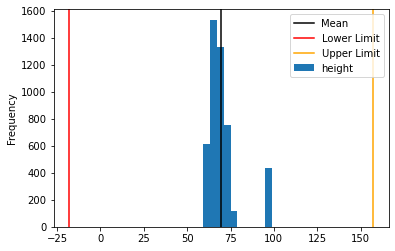

In [25]:
mean = df['height'].mean()
variance = df['height'].var()
df['height'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - variance, color = 'Red', label = 'Lower Limit')
plt.axvline(mean + variance, color = 'Orange', label = 'Upper Limit')
plt.legend()
print(variance)
print(mean)

## Calculating the Standard Deviation

In the cell below, write a function that takes a list of numbers as input and returns the standard deviation of that sample as output.

Recall that the formula for Standard Deviation is:

$$ \Large s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2} $$

You would need the `sqrt()` function from `math` library to calculate the square root.

**Note:** *Alternatively, another approach to finding the square root of a number would be to raise that number to the power of `0.5`. For example, if we wanted to find the square root of `100`, we could raise `100` to the power of `0.5`, which would give us the number `10.0`. However, **either** approach will work.*

```python
100**0.5
# 10.0

from math import sqrt
sqrt(100)
# 10.0
```

In [17]:
from math import sqrt

def get_stddev(x):

    stddev = sqrt(get_variance(x))
    
    return round(stddev, 2)


In [18]:
get_stddev(df["height"])

9.37

+ So 9.37 inches is the amount of deviation present in our dataset. As we are still including outlier values, this might be slightly affected but these results are now much more reliable.

9.367217389528502
69.57826541274817


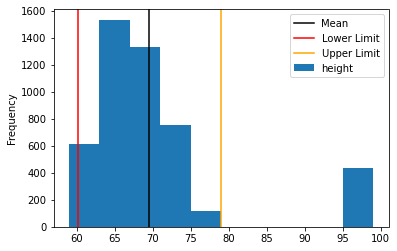

In [24]:
mean = df['height'].mean()
st_dev = df['height'].std()
df['height'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Lower Limit')
plt.axvline(mean + st_dev, color = 'Orange', label = 'Upper Limit')
plt.legend()
print(st_dev)
print(mean)

# Note :
#### Standard Deviation and Variance are all measures of spread of data.
+ Standard Deviation is the square root of variance
+ Read more here STD vs VAR?
http://www.leeds.ac.uk/educol/documents/00003759.htm

## Histogram Shape and Measures of Central Tendency


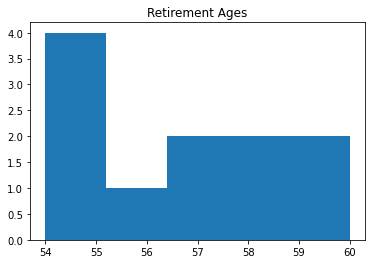

In [19]:
import matplotlib.pyplot as plt
x = [54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 60]
plt.hist(x, bins=5)
plt.title("Retirement Ages")
plt.show()


### Symmetrical Distributions

For symmetric distributions, the mode, median, and mean are all in the middle of the distribution. The following histogram shows a larger retirement age dataset with a distribution which is symmetrical. All central measures in this case are equal to 58 years.

<img src="../../../images/image_sym.png" width="450">

### Skewed Distributions

A non-symmetrical distribution is called a "skewed distribution". For skewed distribution, the mode and median remain unchanged, but the mean generally moves in the direction of the tails. For such distributions, the median is often a preferred measure of central tendency, as the mean does not clearly reflect the central tendency. Based on the direction of mean's movement, such distributions can be further categorized as positively or negatively skewed distributions as shown below:

<img src="../../../images/image_pos.png" width="450">

<img src="../../../images/image_neg.png" width="450">

While performing analytical tasks, skewed distributions need special treatment at times. We will look deeper into this later during the course. 

### Outliers and Measures of Central Tendency

Outliers are extreme or unusual data values that are notably different from the rest of the data. It is important to detect outliers within a distribution, because they can alter the results of the data analysis. The mean is more sensitive to the existence of outliers than the median or mode. 

Let's look again at our retirement dataset, but with one difference; the last observation of 60 years has been replaced with a retirement age of 81 years. 

```
54, 54, 54, 55, 56, 57, 57, 58, 58, 60, **81**
```

The new value is unusual as it is much higher than the other values, and hence considered an *outlier*. 

As all values are included in the calculation of the mean, the outlier will influence the mean value. 

```
54+54+54+55+56+57+57+58+58+60+81 = 644 divided by 11 = 58.5 years
```
So we see that in this distribution the mean has increased due to the outlier. However, it has not changed the middle of the distribution, and therefore the median value is still 57 years. 

Despite the existence of outliers in a distribution, the mean can still be an appropriate measure of central tendency, especially if the rest of the data is normally distributed. If the outlier is confirmed as a valid extreme value, it should be treated accordingly. 


In [20]:
import seaborn as sns

# Let's take a look at how we can identify outliers

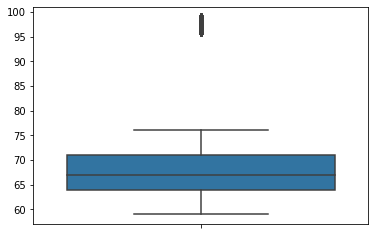

In [23]:
sns.boxplot(height ,orient="v")
plt.show()

# Explaining Outliers using the above plot

![alt text](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)

# Summary:
+ In this session, we performed a basic, yet detailed, statistical analysis around measuring the tendencies of center and spread for a given dataset. We looked at building a number of functions to calculate different measures and also used some statistical visualizations to strengthen our intuitions around the dataset. We shall see how we can simplify this process as we study numpy and pandas libraries to ease out the programming load while calculating basic statistics.